Import libraries

In [12]:
import torch
import numpy as np
import cv2 as cv
import torchvision
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from Dataset import Dataset
import torch.nn as nn
from main import *
from utils import *
import matplotlib

Grid plotting function

In [2]:

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

Load Datasets

In [3]:
s1_data = '/home/nbountos/jh-shared/nbountos-ssh/InSarDA/S1/Train'
s1_data_test = '/home/nbountos/jh-shared/nbountos-ssh/InSarDA/S1/Test'

c1_data = '/home/nbountos/jh-shared/nbountos-ssh/InSarDA/C1'
s1_dataset =  Dataset(s1_data,setting='test',original=True,sim=False)
s1_loader = torch.utils.data.DataLoader(s1_dataset, batch_size=16, shuffle=False, num_workers=1, drop_last = False) 
s1_dataset_test =  Dataset(s1_data_test,setting='test',original=True,sim=False)
c1_dataset = Dataset(c1_data,setting='test',original=True,sim=False)
c1_loader = torch.utils.data.DataLoader(c1_dataset,batch_size=16,shuffle=False,num_workers=1,drop_last=False)

print('S1 Size : ',len(s1_dataset))
print('S1 number of Deformation Patches: ',len(s1_dataset.interferograms_deformation))
print('S1 number of Non-Deformation Patches: ',len(s1_dataset.interferograms_normal))
print('='*20)
print('S1 Test set size : ',len(s1_dataset_test))
print('S1 Test set number of Deformation Patches: ',len(s1_dataset_test.interferograms_deformation))
print('S1 Test set number of Non-Deformation Patches: ',len(s1_dataset_test.interferograms_normal))
print('='*20)
print('C1 Size : ',len(c1_dataset))
print('C1 number of Deformation Patches: ',len(c1_dataset.interferograms_deformation))
print('C1 number of Non-Deformation Patches: ',len(c1_dataset.interferograms_normal))


S1 Size :  7536
S1 number of Deformation Patches:  150
S1 number of Non-Deformation Patches:  7386
S1 Test set size :  64
S1 Test set number of Deformation Patches:  32
S1 Test set number of Non-Deformation Patches:  32
C1 Size :  769
C1 number of Deformation Patches:  404
C1 number of Non-Deformation Patches:  365


Get a few samples from each dataset

In [4]:
(input_s1,_,s1_samples),_,_ = next(iter(s1_loader))
(input_c1,_,c1_samples),_,_ = next(iter(c1_loader))
total_s1 =[]
total_c1 = []
total_s1.extend(s1_samples)
total_c1.extend(c1_samples)


Create Grids

In [5]:
grid = make_grid(total_s1,nrow=4)
grid_c1 = make_grid(total_c1,nrow=4)

Plot Grid.

The grid shows patches from S1.

S1 Contains patches from volcanoes around the world such as: Iceland, Cerro Azul, Taal, Sierra Negra, Rinjani etc.


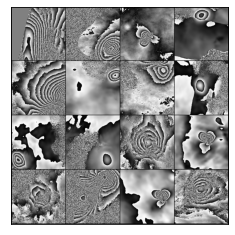

In [6]:
show(grid)

C1 Examples. The grid includes samples from Etna, Iceland and Cerro Azul. C1 also includes Ale Bagu and Taal.
S1 and C1 contain more than 13 volcanic fields.

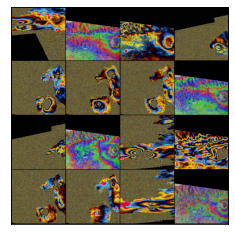

In [7]:
show(grid_c1)

Load a Pretrained ResNet50 Model.
The encoder was trained using the SimCLR framework. 
The last linear layer has been finetuned on S1.

In [8]:
model_path = 'ResNet50SimCLR.pt'
backbone = torchvision.models.resnet50(pretrained=False)
backbone.fc = nn.Linear(2048,2)
backbone.load_state_dict(torch.load(model_path))

<All keys matched successfully>

Evaluate model on C1 test set

In [9]:
test_model(set='C1')91 

769
Accuracy of the network on the test images: 91 %
Finished Training
Correct :  702
Total :  769
False Positives :  10
True Positives:  347
False Negatives :  57
True Negatives :  355


Evaluate on S1/Test set

In [10]:
test_model(set='S1/Test')

64
Accuracy of the network on the test images: 85 %
Finished Training
Correct :  55
Total :  64
False Positives :  8
True Positives:  31
False Negatives :  1
True Negatives :  24


Inspect model's decisions reasoning using Class Activation Mapping (CAM) on recent activity in Iceland.

This method allows us to see which part of the InSAR patch contributed the most to the model's decision.

The examples are shown with increasing intensity.

Prediction :  1


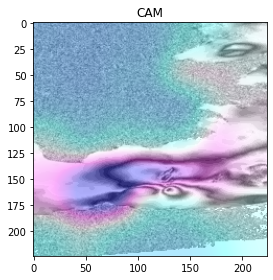

In [11]:
cam('C1/1/iceland_d_20201014_20201113.geo.diff1_2.png')

Prediction :  1


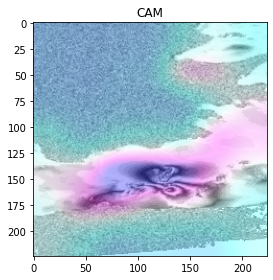

In [12]:
cam('C1/1/iceland_d_20201020_20201119.geo.diff1_2.png')


Prediction :  1


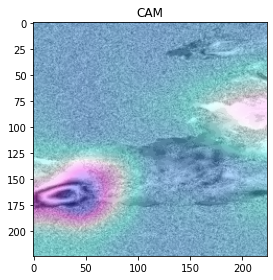

In [13]:
cam('C1/1/iceland_d_20200306_20200604.geo.diff1_2.png')

Prediction :  1


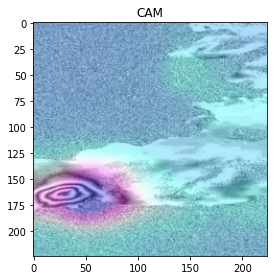

In [14]:
cam('C1/1/iceland_d_20200112_20200405.geo.diff1_2.png')

Prediction :  1


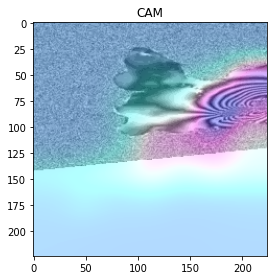

In [15]:
cam('C1/1/iceland_20210120_20210315.geo.diff2_2.png')